In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
data = pd.read_csv('pe_section_headers.csv',delimiter=',')
data

,hash,size_of_data,virtual_address,entropy,virtual_size,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1
...,...,...,...,...,...,...
43288,9b917bab7f32188ae40c744f2be9aaf8,286720,4096,6.585726,286359,1
43289,35a18ee05f75f04912018d9f462cb990,262144,4096,6.638142,261943,1
43290,654139d715abcf7ecdddbef5a84f224b,262144,4096,6.638142,261943,1
43291,078c9d4e7be4819a06974c6f292a4857,443392,4096,6.529624,442984,1


In [3]:
data.shape #размер датафрейма

(43293, 6)

In [4]:
print(data.isna().sum()) #проверяю на наличие пропусков

hash               0
size_of_data       0
virtual_address    0
entropy            0
virtual_size       0
malware            0
dtype: int64


In [5]:
data.info() #все атрибуты кроме hash имеют числовые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43293 entries, 0 to 43292
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hash             43293 non-null  object 
 1   size_of_data     43293 non-null  int64  
 2   virtual_address  43293 non-null  int64  
 3   entropy          43293 non-null  float64
 4   virtual_size     43293 non-null  int64  
 5   malware          43293 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.0+ MB


In [6]:
data.nunique() #malware - является категориальным признаком. hash надо проверить на наличие дубликатов, тк 
#уникальных значений меньше, чем общего количества значений

hash               43144
size_of_data        2659
virtual_address      129
entropy            17613
virtual_size       11715
malware                2
dtype: int64

### предобработка датасета

In [7]:
data.duplicated().sum() #найдено 24 дубликата, посмотрим на них

24

In [8]:
data[data.duplicated()] #вывелись все дубликаты, то есть у них совпадают значения во всех шести колонках. 
#хоть их и немного, но все равно лучше удалю, что провести обучение на максимально чистых и не повторяющихся 
#данных

,hash,size_of_data,virtual_address,entropy,virtual_size,malware
7719,a32a382b8a5a906e03a83b4f3e5b7a9b,51712,4096,6.611199,51549,0
10428,9600d4ff16bd7e21b1a4f534a2327849,47616,4096,6.464158,47210,0
13380,45ea2362bc248bc57395239a5aa490af,602624,4096,6.383961,602244,0
14518,075323e77815ee8bcc7854ce23955a15,35840,4096,6.305845,35752,0
16715,bdaaac3fa3f6796825a51ef1c0e5b3fd,2247168,4096,6.598922,2247161,0
20041,3d8a7a97ea954dd4fe66279df2b445e0,1950720,4096,6.650195,1950553,0
20937,01061d1982f34394e39cde33153c19f4,44032,4096,6.475128,43802,0
21232,79b78bb3d583748040c41ded09555fd3,28672,4096,6.497885,28432,0
21418,03384ab6368b68ed16ecb9e6352539af,35328,4096,6.275874,34856,0
21969,45ea2362bc248bc57395239a5aa490af,602624,4096,6.383961,602244,0


In [9]:
data = data[~data.duplicated()] #убираем повторы

In [10]:
data.duplicated().sum() #проверяем правильно ли все сработало

0

/Users/Katty/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


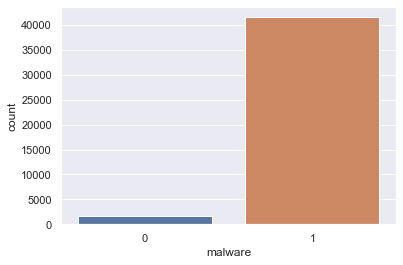

In [11]:
sns.countplot(data['malware'])
plt.show()

обнаружен дисбаланс классов. позже уменьшу выборку, чтобы разница не была такой большой

In [12]:
len(data[data['malware'] == 0])

1701

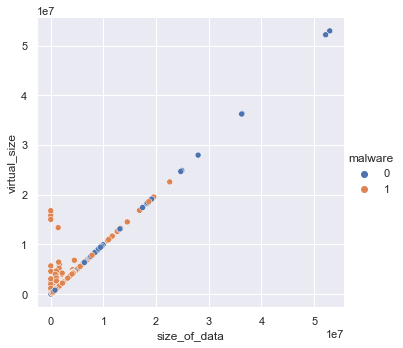

In [13]:
sns.relplot(data=data,x="size_of_data",y="virtual_size",hue="malware")

соотношение size_of_data к virtual_size с указанием вредоносный файл или нет

In [14]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils import resample
from sklearn.datasets import make_classification

In [15]:
df_0 = data[data.malware == 0] #создаем два поднабора данных для 0 и 1 
df_1 = data[data.malware == 1]
  
# создаем новый поднабор данных для 1
df_1_sample = resample(df_1,
                           replace=False,    
                           n_samples=7000,  #задаем значение сколько нам нужно данных 
                           random_state=1)
  
# объединяются в новый набор классов
df_sample = pd.concat([df_0, df_1_sample])
  
# смотрим на изменение размера классов
print(df_sample.malware.value_counts())

1    7000
0    1701
Name: malware, dtype: int64


/Users/Katty/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


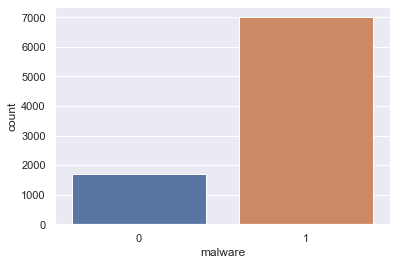

In [16]:
sns.countplot(df_sample['malware'])
plt.show()

In [60]:
target = df_sample['malware'] #отделяем
data = df_sample.drop(['malware'], axis=1)

In [61]:
y = target
X = df_sample.hash #помещаем сюда текстовые данные

In [62]:
#делим на обучающую и тестовую выборку, тестовая составляет 20 процентов

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=True) 

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
# Преобразование текста в набор численных вектором 

vectorizer = CountVectorizer()
X_vec_train = vectorizer.fit_transform(X_train)
X_vec_test = vectorizer.transform(X_test)
len(X_train), X_vec_train.shape

(6960, (6960, 6957))

## Машинное обучение

#### (обучение на основе текстовых данных)

### 1 модель

In [65]:
clf = MultinomialNB(alpha=0.01)
clf.fit(X_vec_train, y_train)

y_pred = clf.predict(X_vec_test)

Text(0.5, 66.5, 'Предсказанные значения')

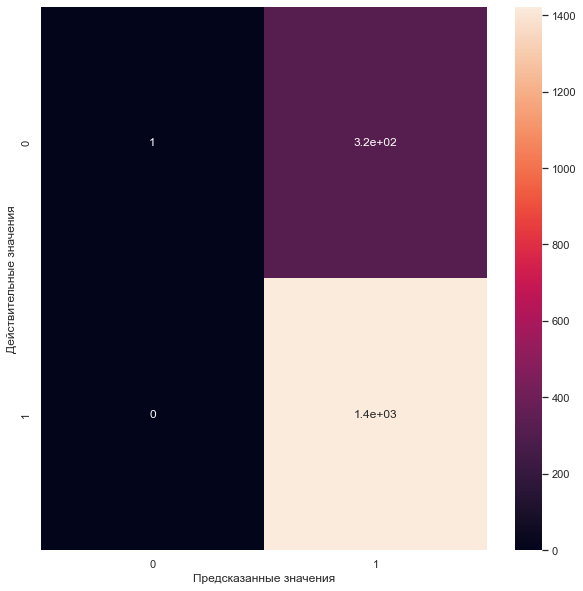

In [66]:
matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(matrix), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [67]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       319
           1       0.82      1.00      0.90      1422

    accuracy                           0.82      1741
   macro avg       0.91      0.50      0.45      1741
weighted avg       0.85      0.82      0.74      1741



### 2 модель

In [68]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_vec_train, y_train)
y_pred_lr = model_lr.predict(X_vec_test)

In [69]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.82      1.00      0.90      1422

    accuracy                           0.82      1741
   macro avg       0.41      0.50      0.45      1741
weighted avg       0.67      0.82      0.73      1741



/Users/Katty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Katty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Katty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Предсказанные значения')

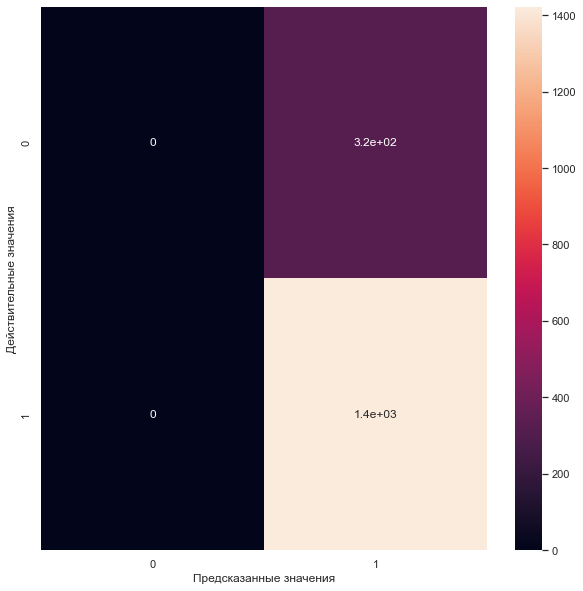

In [70]:
matrix = metrics.confusion_matrix(y_test, y_pred_lr)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(matrix), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

### 3 модель

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_vec_train, y_train)
y_pred_rfc = rfc.predict(X_vec_test)

In [72]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       319
           1       0.82      1.00      0.90      1422

    accuracy                           0.82      1741
   macro avg       0.91      0.50      0.45      1741
weighted avg       0.85      0.82      0.74      1741



Text(0.5, 66.5, 'Предсказанные значения')

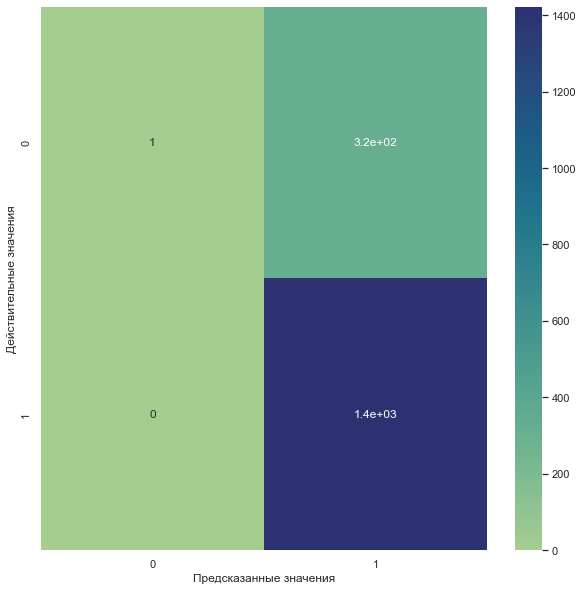

In [73]:
matrix = metrics.confusion_matrix(y_test, y_pred_rfc)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(matrix), annot=True,cmap="crest")
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

### 4 модель (в работе упомянула только 1 и 3 модели)

In [74]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_vec_train, y_train)
y_pred_svc = svc.predict(X_vec_test)

Text(0.5, 66.5, 'Предсказанные значения')

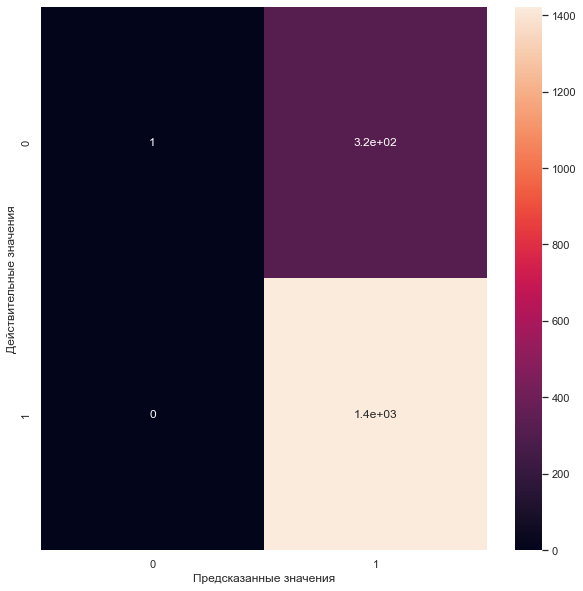

In [75]:
matrix = metrics.confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(matrix), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [76]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       319
           1       0.82      1.00      0.90      1422

    accuracy                           0.82      1741
   macro avg       0.91      0.50      0.45      1741
weighted avg       0.85      0.82      0.74      1741



## глубокое обучение

In [77]:
import tensorflow as tf
from tensorflow import keras


In [78]:

# Создание модели

model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=10000, output_dim=16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))


In [79]:

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [80]:
# Обучение модели
history = model.fit(X_vec_train.toarray(), y_train, epochs=3, batch_size=512, validation_data=(X_vec_test.toarray(), y_test))


Epoch 1/3
14/14 [==============================] - 4s 260ms/step - loss: 0.6842 - accuracy: 0.7095 - val_loss: 0.6698 - val_accuracy: 0.8168
Epoch 2/3
14/14 [==============================] - 3s 245ms/step - loss: 0.6607 - accuracy: 0.8014 - val_loss: 0.6466 - val_accuracy: 0.8168
Epoch 3/3
14/14 [==============================] - 3s 248ms/step - loss: 0.6396 - accuracy: 0.8014 - val_loss: 0.6244 - val_accuracy: 0.8168


In [81]:

# Оценка модели
loss, accuracy = model.evaluate(X_vec_test.toarray(), y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


55/55 [==============================] - 0s 7ms/step - loss: 0.6244 - accuracy: 0.8168
Loss: 0.6244011521339417, Accuracy: 0.8167719841003418


In [82]:
from sklearn.metrics import accuracy_score

### сравнение

In [83]:

print(f'MultinomialNB          | Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'RandomForestClassifier | Accuracy: {accuracy_score(y_test, y_pred_rfc)}')
print(f'Нейроонная сеть        | Accuracy: {accuracy}')

MultinomialNB          | Accuracy: 0.8173463526708789
RandomForestClassifier | Accuracy: 0.8173463526708789
Нейроонная сеть        | Accuracy: 0.8167719841003418


---

### Теперь тоже самое, только с числовыми данными (virtual_size,size_of_data,entropy, virlual_address)  

я решили провести обучение на числовых данных, тк заметила что обучение по заголовкам файлов не всегда корректно. поэтому эта часть работы решает вопрос удобно ли вообще обнаружать вреденосное ПО по заголовкам файлов

In [41]:
y = target
X = df_sample.drop(['hash'], axis=1)

In [42]:
#делим на обучающую и тестовую выборку, тестовая составляет 20 процентов

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=True) 

### 1 модель

In [43]:
clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Text(0.5, 66.5, 'Предсказанные значения')

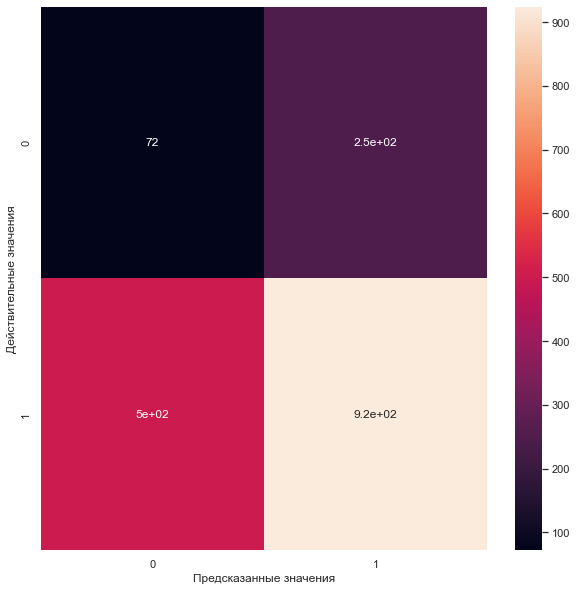

In [44]:
matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(matrix), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.23      0.16       319
           1       0.79      0.65      0.71      1422

    accuracy                           0.57      1741
   macro avg       0.46      0.44      0.44      1741
weighted avg       0.67      0.57      0.61      1741



### 2 модель

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [47]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      1741
   macro avg       1.00      1.00      1.00      1741
weighted avg       1.00      1.00      1.00      1741



Text(0.5, 66.5, 'Предсказанные значения')

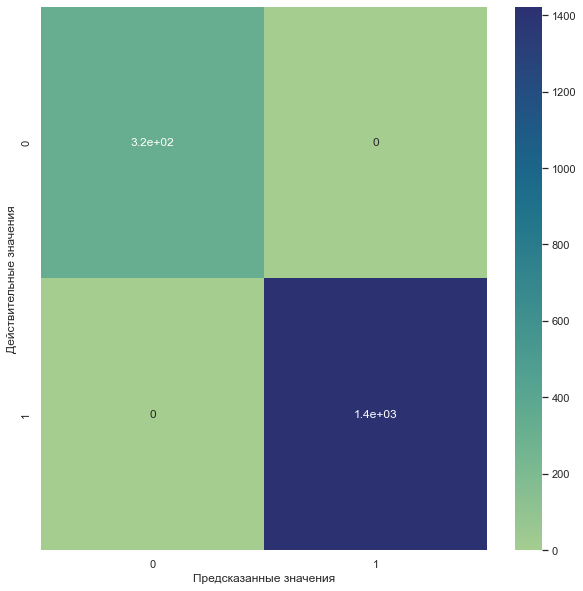

In [48]:
matrix = metrics.confusion_matrix(y_test, y_pred_rfc)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(matrix), annot=True,cmap="crest")
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

### глубокое обучение

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [52]:
def create_baseline():
    # создаю модель
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # компилирую модель
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
# Оценить модель со стандартизированным набором данных
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=False)
results = cross_val_score(estimator, X,  y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/var/folders/zj/21ldn1d15sv91ybhtv_6hzm40000gn/T/ipykernel_34230/1884580849.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)


Results: 80.45% (0.03%)


In [54]:
from sklearn.metrics import accuracy_score
print(f'MultinomialNB          | Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'RandomForestClassifier | Accuracy: {accuracy_score(y_test, y_pred_rfc)}')
print(f'Нейронная сеть         | Accuracy: {results.mean()}')

MultinomialNB          | Accuracy: 0.5720850086157381
RandomForestClassifier | Accuracy: 1.0
Нейронная сеть         | Accuracy: 0.8045053005218505
